In [1]:
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
from sklearn.model_selection import train_test_split
import gensim
from sklearn.linear_model import LogisticRegression
from gensim.models.doc2vec import TaggedDocument
import re
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import multiprocessing
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from gensim.test.test_doc2vec import ConcatenatedDoc2Vec
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')
cores = multiprocessing.cpu_count()
os.listdir()

['opencv-text-detection.zip',
 '.ipynb_checkpoints',
 'accepted_projects',
 'Andrew W. Trask - Grokking Deep Learning-Manning Publications (2019).pdf',
 'Collective_Dataset',
 'corpus',
 'corpus.zip',
 'doc2vec.ipynb',
 'doc2vec_with_kfold.html',
 'doc2vec_with_kfold.ipynb',
 'Final Slides and Books',
 'google-play-store-apps',
 'google-play-store-apps.zip',
 'helpline-of-all-sorts',
 'helpline-of-all-sorts.zip',
 'kmeans_clustering.ipynb',
 'labels.txt',
 'logistic_regression.ipynb',
 'MURA-v1.1',
 'MURA-v1.1.zip',
 'nltk',
 'opencv-text-detection',
 'Papers',
 'Papers.zip',
 'Papers_Association_Rule',
 'processed_dataset.csv',
 'Results',
 'reviews.txt',
 'sentiment_analysis_from_story_preprocessing.ipynb',
 'sentiment_dictionary.csv',
 'sklearn_test.ipynb',
 'Slides',
 'Story-categorization-using-NLP',
 'Tan.pdf',
 'Testing',
 'Udacity',
 'videodata.csv',
 'word2vec.model',
 'word2vector_test.ipynb']

In [2]:
df = pd.read_csv(os.getcwd() + "/Collective_Dataset/419_data - Sheet1.csv", usecols=[0,1])#header=None, , names=['story', 'category']

In [4]:
df.head(10)

,story,category
0,"Just like any other day, employees arrived in ...",0
1,My so-called ‘friends’ in middle school used t...,1
2,i have been called hurtful names and i have be...,1
3,at my old school kids would hit me and call me...,1
4,I had debilitating migraines for three years b...,0
5,"I love my work, but hate going each day becaus...",0
6,I have a chronic illness which was doing well ...,0
7,The other part is that sense of worthlessness....,0
8,I feel my whole body hurting. My mental health...,0
9,"As a librarian, I've been threatened with stal...",2


In [5]:
df['story']

0      Just like any other day, employees arrived in ...
1      My so-called ‘friends’ in middle school used t...
2      i have been called hurtful names and i have be...
3      at my old school kids would hit me and call me...
4      I had debilitating migraines for three years b...
                             ...                        
184    This happened when I was about 23 and working ...
185    During the holidays I’d wear a santa hat to wo...
186    I’m currently working at Starbucks, and as a 2...
187    I’ve had to deal with male customers who stop ...
188    I worked at a well-known hardware store and a ...
Name: story, Length: 189, dtype: object

In [6]:
df['category']

0      0
1      1
2      1
3      1
4      0
      ..
184    2
185    2
186    2
187    2
188    2
Name: category, Length: 189, dtype: int64

In [7]:
df.shape

(189, 2)

In [8]:
df.index = range(189)

In [9]:
df.story.apply(lambda x: len(x.split(' '))).sum()

35116

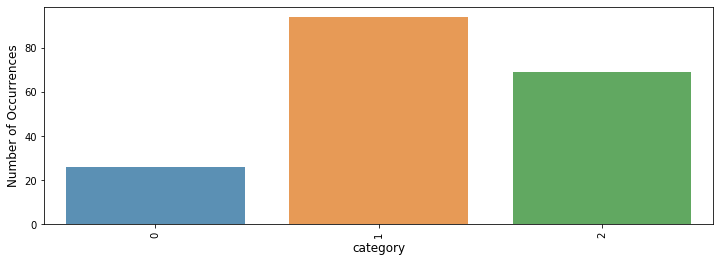

In [10]:
cnt_pro = df['category'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(cnt_pro.index, cnt_pro.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('category', fontsize=12)
plt.xticks(rotation=90)
plt.show();

In [11]:
work_stress_counter, bullying_counter, sexual_harassment_counter = 0, 0, 0
for c in df['category']:
    if c==0:
        work_stress_counter+=1
    elif c == 1:
        bullying_counter+=1
    else:
        sexual_harassment_counter+=1
print("Work Stress Total Data Count: ", work_stress_counter)
print("Bullying Total Data Count: ", bullying_counter)
print("Sexual Harassment Total Data Count: ", sexual_harassment_counter)

Work Stress Total Data Count:  26
Bullying Total Data Count:  94
Sexual Harassment Total Data Count:  69


In [12]:
print(df.story[2])
print(df.category[2])

i have been called hurtful names and i have been called black bitch and people are making fun of me for being black by my suppost to be friend t and she has posted rumors about me and i dont know what to do.
1


In [13]:
print(df.story[0])
print(df.category[0])

Just like any other day, employees arrived in the workplace sparingly, filling the cubicles and getting their coffees ready. Once more, the manager was already sitting at his desk, grumbling and shouting - You’re way too slow, again! How am I supposed to get my work done with you slowing me down every day? The other employees were staring at each other. They were embarrassed by his outburst but deep inside they knew he was right. Satisfied by the nods in the assembly, the manager calmed down. As usual, he quickly got absorbed by his screen and numerous emails. He was not the moody type, just a normal guy. His team liked him very much and his performance record was exemplary. He was often described as someone caring and trustworthy with a genuine interest in people. Yet once again, his fist hit the desk loudly as he started screaming. That’s it, I’m done! Slow and unreliable old crap! You made me lose five hours of my life, again. World will be better off without you and I’m going to le

In [14]:
print(df.story[10])
print(df.category[10])

I worked as an office manager, and the only woman, for an industrial insulation company. I had just come back from maternity leave and I was worried about my milk supply. I went into the bathroom to pump for about 15 minutes every two hours, and all of the men in the office would stand in the break area (right in front of the bathroom door) and make baby crying noises to make fun of me. Eventually it progressed to the point that they would make crying noises every time they passed my desk in hopes that I would leak through my shirt. They would also make comments about how much larger my breasts were since having a baby. I felt so harassed and unsafe that I would dread going to work every day, and I even had more than a few nervous breakdowns. My husband was furious and I had to convince him not to take any drastic action so that I could be sure to have a good reference if I needed to find another job. We had a long conversation and looked at our finances and decided the extra money was

In [15]:
from bs4 import BeautifulSoup
def cleanText(text):
    text = BeautifulSoup(text, "lxml").text
    text = re.sub(r'\|\|\|', r' ', text) 
    text = re.sub(r'http\S+', r'<URL>', text)
    text = text.lower()
    text = text.replace('x', '')
    return text
df['story'] = df['story'].apply(cleanText)

In [16]:
def tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sent):
            if len(word) < 2:
                continue
            tokens.append(word.lower())
    return tokens

### WITH TRAIN_TEST_SPLIT

In [17]:
train, test = train_test_split(df, test_size = .20, random_state = 2)

In [18]:
train_tagged = train.apply(lambda r: TaggedDocument(words=tokenize_text(r['story']), tags=[r['category']]), axis=1)
test_tagged = test.apply(lambda r: TaggedDocument(words=tokenize_text(r['story']), tags=[r['category']]), axis=1)

In [19]:
train

,story,category
140,"i loved my work, but hated going each day beca...",0
89,"well it all started in year 7, i told one of m...",1
53,i’ve always been super flat-chested and i’m st...,1
112,"it started in year 7, which i think is like 6t...",1
71,i was around 12-13 years old and at this “meet...,1
...,...,...
43,i was on my way from gabtoli to mirpur on a bu...,2
22,"hi, i'm rahul. i was bullied all through schoo...",1
72,"when i was in 7th grade, i had a semester of m...",1
15,"i got made fun of for being fat in elementary,...",1


In [20]:
len(train)

151

In [21]:
test

,story,category
23,i was born with a craniofacial disease called ...,1
78,my school has always been the type to say they...,1
35,"when i got admitted in a well reputed college,...",1
10,"i worked as an office manager, and the only wo...",2
66,i got beaten up and verbally abused from 1st g...,1
2,i have been called hurtful names and i have be...,1
138,i don’t know how to start this but i really ne...,2
29,i was in class 11. i was coming back from my t...,1
128,the first time was the day after my 20th birth...,2
85,my story might be short because i only remembe...,1


In [22]:
len(test)

38

In [23]:
train_tagged

140    ([loved, my, work, but, hated, going, each, da...
89     ([well, it, all, started, in, year, told, one,...
53     ([ve, always, been, super, flat-chested, and, ...
112    ([it, started, in, year, which, think, is, lik...
71     ([was, around, 12-13, years, old, and, at, thi...
                             ...                        
43     ([was, on, my, way, from, gabtoli, to, mirpur,...
22     ([hi, 'm, rahul, was, bullied, all, through, s...
72     ([when, was, in, 7th, grade, had, semester, of...
15     ([got, made, fun, of, for, being, fat, in, ele...
168    ([let, me, tell, you, about, few, of, my, eper...
Length: 151, dtype: object

In [24]:
train_tagged.values[2]

TaggedDocument(words=['ve', 'always', 'been', 'super', 'flat-chested', 'and', 'still', 'totally', 'traumatized', 'by', 'something', 'that', 'happened', 'in', 'seventh', 'grade', 'these', 'two', 'guys', 'came', 'up', 'to', 'me', 'and', 'asked', 'if', 'they', 'could', 'call', 'me', 'stingray', 'because', 'you', 're', 'really', 'flat.', 'pretty', 'sure', 'the', 'name', 'continued', 'for', 'the', 'rest', 'of', 'that', 'school', 'year'], tags=[1])

In [25]:
test_tagged.values[1]

TaggedDocument(words=['my', 'school', 'has', 'always', 'been', 'the', 'type', 'to', 'say', 'they', 'would', 'do', 'everything', 'they', 'could', 'to', 'prevent', 'bullying', 'tons', 'of', 'assembly', 'about', 'anti-bullying', 'but', 'in', '7th', 'grade', 'felt', 'like', 'would', 'be', 'better', 'off', 'dead', 'this', 'one', 'girl', 'and', 'were', 'friends', 'kinda', 'we', 'laughed', 'together', 'but', 'she', 'didn', 'know', 'the', 'limits', 'she', 'started', 'hurting', 'me', 'physically', 'and', 'mentally', 'she', 'hit', 'me', 'square', 'in', 'the', 'stomach', 'one', 'day', 'that', 'when', 'realized', 'that', 'this', 'wasn', 'joke', 'to', 'her', 'she', 'kicked', 'me', 'she', 'slapped', 'me', 'left', 'red', 'marks', 'on', 'my', 'face', 'she', 'would', 'even', 'go', 'as', 'far', 'as', 'grabbing', 'my', 'hand', 'with', 'such', 'powerful', 'grip', 'that', 'couldn', 'get', 'away', 'and', 'she', 'would', 'dig', 'three', 'nails', 'into', 'my', 'wrist', 'leaving', 'purple', 'mark', 'afterwards

### PV-DBOW

In [26]:
model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, hs=0, min_count=2, sample = 0, workers=cores)
model_dbow.build_vocab([x for x in tqdm(train_tagged.values)])

100%|██████████| 151/151 [00:00<00:00, 161731.33it/s]


In [27]:
%%time
for epoch in range(5):
    model_dbow.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

100%|██████████| 151/151 [00:00<00:00, 559982.23it/s]

CPU times: user 249 ms, sys: 2.89 ms, total: 252 ms
Wall time: 105 ms


In [28]:
def vec_for_learning(model, tagged_docs):
    sents = tagged_docs.values
    targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
    return targets, regressors

In [29]:
y_train, X_train = vec_for_learning(model_dbow, train_tagged)
y_test, X_test = vec_for_learning(model_dbow, test_tagged)

In [30]:
logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [31]:
print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))
print('\nTesting Confusion Matrix: ')
print(confusion_matrix(y_test, y_pred),"\n")
print('Testing Classification Report: ')
print(classification_report(y_test, y_pred))

Testing accuracy 0.8421052631578947
Testing F1 score: 0.8434847803268856

Testing Confusion Matrix: 
[[ 3  1  0]
 [ 0 18  0]
 [ 3  2 11]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.50      0.75      0.60         4
           1       0.86      1.00      0.92        18
           2       1.00      0.69      0.81        16

    accuracy                           0.84        38
   macro avg       0.79      0.81      0.78        38
weighted avg       0.88      0.84      0.84        38



### PV-DM

In [32]:
model_dmm = Doc2Vec(dm=1, dm_mean=1, vector_size=300, window=10, negative=5, min_count=1, workers=5, alpha=0.065, min_alpha=0.065)
model_dmm.build_vocab([x for x in tqdm(train_tagged.values)])

100%|██████████| 151/151 [00:00<00:00, 838860.80it/s]


In [33]:
%%time
for epoch in range(5):
    model_dmm.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
    model_dmm.alpha -= 0.002
    model_dmm.min_alpha = model_dmm.alpha

100%|██████████| 151/151 [00:00<00:00, 654276.76it/s]

CPU times: user 308 ms, sys: 20.6 ms, total: 328 ms
Wall time: 158 ms


In [34]:
y_train, X_train = vec_for_learning(model_dmm, train_tagged)
y_test, X_test = vec_for_learning(model_dmm, test_tagged)

In [35]:
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [36]:
print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))
print('\nTesting Confusion Matrix: ')
print(confusion_matrix(y_test, y_pred),"\n")
print('Testing Classification Report: ')
print(classification_report(y_test, y_pred))

Testing accuracy 0.8947368421052632
Testing F1 score: 0.8975988357991752

Testing Confusion Matrix: 
[[ 4  0  0]
 [ 1 16  1]
 [ 1  1 14]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         4
           1       0.94      0.89      0.91        18
           2       0.93      0.88      0.90        16

    accuracy                           0.89        38
   macro avg       0.85      0.92      0.87        38
weighted avg       0.91      0.89      0.90        38



### Paired Model

In [37]:
model_dbow.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)
model_dmm.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)

In [38]:
new_model = ConcatenatedDoc2Vec([model_dbow, model_dmm])

In [39]:
def get_vectors(model, tagged_docs):
    sents = tagged_docs.values
    targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
    return targets, regressors

In [40]:
y_train, X_train = get_vectors(new_model, train_tagged)
y_test, X_test = get_vectors(new_model, test_tagged)

In [41]:
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [42]:
print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))
print('\nTesting Confusion Matrix: ')
print(confusion_matrix(y_test, y_pred),"\n")
print('Testing Classification Report: ')
print(classification_report(y_test, y_pred))

Testing accuracy 0.8947368421052632
Testing F1 score: 0.8969833717565115

Testing Confusion Matrix: 
[[ 4  0  0]
 [ 1 17  0]
 [ 1  2 13]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         4
           1       0.89      0.94      0.92        18
           2       1.00      0.81      0.90        16

    accuracy                           0.89        38
   macro avg       0.85      0.92      0.87        38
weighted avg       0.92      0.89      0.90        38



### WITH K-FOLD

In [43]:
X = df['story']
print("Length: ", len(X))
print("Type: ", type(X))
print("First Ten Values:\n", X[:10])
print(X[0])

Length:  189
Type:  <class 'pandas.core.series.Series'>
First Ten Values:
 0    just like any other day, employees arrived in ...
1    my so-called ‘friends’ in middle school used t...
2    i have been called hurtful names and i have be...
3    at my old school kids would hit me and call me...
4    i had debilitating migraines for three years b...
5    i love my work, but hate going each day becaus...
6    i have a chronic illness which was doing well ...
7    the other part is that sense of worthlessness....
8    i feel my whole body hurting. my mental health...
9    as a librarian, i've been threatened with stal...
Name: story, dtype: object
just like any other day, employees arrived in the workplace sparingly, filling the cubicles and getting their coffees ready. once more, the manager was already sitting at his desk, grumbling and shouting - you’re way too slow, again! how am i supposed to get my work done with you slowing me down every day? the other employees were staring at each

In [44]:
y = df['category']
print("Length: ", len(y))
print("Type: ", type(y))
print("First Ten Values: ", y[:10])

Length:  189
Type:  <class 'pandas.core.series.Series'>
First Ten Values:  0    0
1    1
2    1
3    1
4    0
5    0
6    0
7    0
8    0
9    2
Name: category, dtype: int64


In [45]:
ten_fold = KFold(n_splits=2)
ten_fold

KFold(n_splits=2, random_state=None, shuffle=False)

In [46]:
ten_fold.get_n_splits(X)

2

### K-FOLD PV-DBOW

In [47]:
fold_no = 1
for train_index, test_index in ten_fold.split(X):
    print("Train Fold No.: ", train_index, " Test Fold No.: ", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    X_train = list(zip(X_train,y_train))
    X_train = pd.DataFrame(X_train, columns=['story', 'category'])
    
    X_test = list(zip(X_test,y_test))
    X_test = pd.DataFrame(X_test, columns=['story', 'category'])
    
    train_tagged = X_train.apply(lambda r: TaggedDocument(words=tokenize_text(r['story']), tags=[r['category']]), axis=1)
    test_tagged = X_test.apply(lambda r: TaggedDocument(words=tokenize_text(r['story']), tags=[r['category']]), axis=1)
    
    model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, hs=0, min_count=2, sample = 0, workers=cores)
    model_dbow.build_vocab([x for x in tqdm(train_tagged.values)])
    
    for epoch in range(5):
        model_dbow.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
        model_dbow.alpha -= 0.002
        model_dbow.min_alpha = model_dbow.alpha
    
    def vec_for_learning(model, tagged_docs):
        sents = tagged_docs.values
        targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
        return targets, regressors
    
    y_trained, X_trained = vec_for_learning(model_dbow, train_tagged)
    y_tested, X_tested = vec_for_learning(model_dbow, test_tagged)
    
    logreg = LogisticRegression(n_jobs=1, C=1e5)
    logreg.fit(X_trained, y_trained)
    y_pred = logreg.predict(X_tested)
    
    print("Fold No.: ", fold_no)
    print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
    print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))
    print('\nTesting Confusion Matrix: ')
    print(confusion_matrix(y_test, y_pred),"\n")
    print('Testing Classification Report: ')
    print(classification_report(y_test, y_pred))
    
    print("\n\n")
    fold_no+=1

Train Fold No.:  [ 95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112
 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130
 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148
 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166
 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184
 185 186 187 188]  Test Fold No.:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94]


100%|██████████| 94/94 [00:00<00:00, 529214.20it/s]


Fold No.:  1
Testing accuracy 0.7263157894736842
Testing F1 score: 0.7465149359886202

Testing Confusion Matrix: 
[[11  0  1]
 [12 44 11]
 [ 2  0 14]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.44      0.92      0.59        12
           1       1.00      0.66      0.79        67
           2       0.54      0.88      0.67        16

    accuracy                           0.73        95
   macro avg       0.66      0.82      0.68        95
weighted avg       0.85      0.73      0.75        95




Train Fold No.:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94]  Test Fold No.:  [ 95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112
 113 114 115 116 117 118 119 120 1

100%|██████████| 95/95 [00:00<00:00, 257902.19it/s]


Fold No.:  2
Testing accuracy 0.5957446808510638
Testing F1 score: 0.5916427065363236

Testing Confusion Matrix: 
[[ 8  6  0]
 [ 0 27  0]
 [ 2 30 21]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.80      0.57      0.67        14
           1       0.43      1.00      0.60        27
           2       1.00      0.40      0.57        53

    accuracy                           0.60        94
   macro avg       0.74      0.66      0.61        94
weighted avg       0.81      0.60      0.59        94






### K-FOLD PV-DM 

In [48]:
fold_no = 1
for train_index, test_index in ten_fold.split(X):
    print("Train Fold No.: ", train_index, " Test Fold No.: ", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    X_train = list(zip(X_train,y_train))
    X_train = pd.DataFrame(X_train, columns=['story', 'category'])
    
    X_test = list(zip(X_test,y_test))
    X_test = pd.DataFrame(X_test, columns=['story', 'category'])
    
    train_tagged = X_train.apply(lambda r: TaggedDocument(words=tokenize_text(r['story']), tags=[r['category']]), axis=1)
    test_tagged = X_test.apply(lambda r: TaggedDocument(words=tokenize_text(r['story']), tags=[r['category']]), axis=1)
    
    model_dmm = Doc2Vec(dm=1, dm_mean=1, vector_size=300, window=10, negative=5, min_count=1, workers=5, alpha=0.065, min_alpha=0.065)
    model_dmm.build_vocab([x for x in tqdm(train_tagged.values)])
    
    for epoch in range(5):
        model_dmm.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
        model_dmm.alpha -= 0.002
        model_dmm.min_alpha = model_dmm.alpha
    
    def vec_for_learning(model, tagged_docs):
        sents = tagged_docs.values
        targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
        return targets, regressors
    
    y_trained, X_trained = vec_for_learning(model_dmm, train_tagged)
    y_tested, X_tested = vec_for_learning(model_dmm, test_tagged)
    
    logreg = LogisticRegression(n_jobs=1, C=1e5)
    logreg.fit(X_trained, y_trained)
    y_pred = logreg.predict(X_tested)
    
    print("Fold No.: ", fold_no)
    print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
    print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))
    print('\nTesting Confusion Matrix: ')
    print(confusion_matrix(y_test, y_pred),"\n")
    print('Testing Classification Report: ')
    print(classification_report(y_test, y_pred))
    print("\n\n")
    fold_no+=1

Train Fold No.:  [ 95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112
 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130
 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148
 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166
 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184
 185 186 187 188]  Test Fold No.:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94]


100%|██████████| 94/94 [00:00<00:00, 892001.30it/s]


Fold No.:  1
Testing accuracy 0.8
Testing F1 score: 0.8161223571749888

Testing Confusion Matrix: 
[[10  0  2]
 [ 3 50 14]
 [ 0  0 16]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        12
           1       1.00      0.75      0.85        67
           2       0.50      1.00      0.67        16

    accuracy                           0.80        95
   macro avg       0.76      0.86      0.77        95
weighted avg       0.89      0.80      0.82        95




Train Fold No.:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94]  Test Fold No.:  [ 95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112
 113 114 115 116 117 118 119 120 121 122 123 124 

100%|██████████| 95/95 [00:00<00:00, 699050.67it/s]


Fold No.:  2
Testing accuracy 0.5851063829787234
Testing F1 score: 0.5752574494063856

Testing Confusion Matrix: 
[[ 9  5  0]
 [ 0 27  0]
 [ 2 32 19]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.64      0.72        14
           1       0.42      1.00      0.59        27
           2       1.00      0.36      0.53        53

    accuracy                           0.59        94
   macro avg       0.75      0.67      0.61        94
weighted avg       0.81      0.59      0.58        94






### PAIRED MODEL

In [49]:
fold_no = 1
print("Total Fold No.: 2\n\n")
for train_index, test_index in ten_fold.split(X):
#     print("Train Fold No.: ", train_index, " Test Fold No.: ", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    X_train = list(zip(X_train,y_train))
    X_train = pd.DataFrame(X_train, columns=['story', 'category'])
    
    X_test = list(zip(X_test,y_test))
    X_test = pd.DataFrame(X_test, columns=['story', 'category'])
    
    train_tagged = X_train.apply(lambda r: TaggedDocument(words=tokenize_text(r['story']), tags=[r['category']]), axis=1)
    test_tagged = X_test.apply(lambda r: TaggedDocument(words=tokenize_text(r['story']), tags=[r['category']]), axis=1)
    
    #PV_DBOW
    model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, hs=0, min_count=2, sample = 0, workers=cores)
    model_dbow.build_vocab([x for x in tqdm(train_tagged.values)])
    
    for epoch in range(5):
        model_dbow.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
        model_dbow.alpha -= 0.002
        model_dbow.min_alpha = model_dbow.alpha
    
    def vec_for_learning(model, tagged_docs):
        sents = tagged_docs.values
        targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
        return targets, regressors
    
    y_trained, X_trained = vec_for_learning(model_dbow, train_tagged)
    y_tested, X_tested = vec_for_learning(model_dbow, test_tagged)
    
    logreg_dbow = LogisticRegression(n_jobs=1, C=1e5)
    logreg_dbow.fit(X_trained, y_trained)
    y_pred = logreg_dbow.predict(X_tested)
    
    print("FOR PV_DBOW: ")
    print("Fold No.: ", fold_no)
    print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
    print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))
    print('\nTesting Confusion Matrix: ')
    print(confusion_matrix(y_test, y_pred),"\n")
    print('Testing Classification Report: ')
    print(classification_report(y_test, y_pred))    
    print("\n\n")
    
    
    
    #PV_DM
    model_dmm = Doc2Vec(dm=1, dm_mean=1, vector_size=300, window=10, negative=5, min_count=1, workers=5, alpha=0.065, min_alpha=0.065)
    model_dmm.build_vocab([x for x in tqdm(train_tagged.values)])
    
    for epoch in range(5):
        model_dmm.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
        model_dmm.alpha -= 0.002
        model_dmm.min_alpha = model_dmm.alpha
    
    y_trained, X_trained = vec_for_learning(model_dmm, train_tagged)
    y_tested, X_tested = vec_for_learning(model_dmm, test_tagged)
    
    logreg_dm = LogisticRegression(n_jobs=1, C=1e5)
    logreg_dm.fit(X_trained, y_trained)
    y_pred = logreg_dm.predict(X_tested)
    
    print("FOR PV_DM: ")
    print("Fold No.: ", fold_no)
    print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
    print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))
    print('\nTesting Confusion Matrix: ')
    print(confusion_matrix(y_test, y_pred),"\n")
    print('Testing Classification Report: ')
    print(classification_report(y_test, y_pred))    
    print("\n\n")
    
    
    #FOR PAIRED_MODEL
    model_dbow.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)
    model_dmm.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)
    
    new_model = ConcatenatedDoc2Vec([model_dbow, model_dmm])
    
    y_train, X_train = vec_for_learning(new_model, train_tagged)
    y_test, X_test = vec_for_learning(new_model, test_tagged)
    
    logreg_paired = LogisticRegression(n_jobs=1, C=1e5)
    logreg_paired.fit(X_train, y_train)
    y_pred = logreg_paired.predict(X_test)
    
    print("FOR Paired Model: ")
    print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
    print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))
    print('\nTesting Confusion Matrix: ')
    print(confusion_matrix(y_test, y_pred),"\n")
    print('Testing Classification Report: ')
    print(classification_report(y_test, y_pred))
    fold_no+=1

Total Fold No.: 2




100%|██████████| 94/94 [00:00<00:00, 811243.98it/s]

FOR PV_DBOW: 
Fold No.:  1
Testing accuracy 0.7368421052631579
Testing F1 score: 0.7533585807270018

Testing Confusion Matrix: 
[[11  0  1]
 [11 44 12]
 [ 1  0 15]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.48      0.92      0.63        12
           1       1.00      0.66      0.79        67
           2       0.54      0.94      0.68        16

    accuracy                           0.74        95
   macro avg       0.67      0.84      0.70        95
weighted avg       0.86      0.74      0.75        95







100%|██████████| 94/94 [00:00<00:00, 405205.11it/s]


FOR PV_DM: 
Fold No.:  1
Testing accuracy 0.8105263157894737
Testing F1 score: 0.8223390069809394

Testing Confusion Matrix: 
[[ 9  1  2]
 [ 3 53 11]
 [ 0  1 15]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.75      0.75      0.75        12
           1       0.96      0.79      0.87        67
           2       0.54      0.94      0.68        16

    accuracy                           0.81        95
   macro avg       0.75      0.83      0.77        95
weighted avg       0.86      0.81      0.82        95




FOR Paired Model: 
Testing accuracy 0.7789473684210526
Testing F1 score: 0.7926801168180478

Testing Confusion Matrix: 
[[10  1  1]
 [ 6 49 12]
 [ 1  0 15]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.59      0.83      0.69        12
           1       0.98      0.73      0.84        67
           2       0.54      0.94      0.68        16

    accura

100%|██████████| 95/95 [00:00<00:00, 883500.84it/s]

FOR PV_DBOW: 
Fold No.:  2
Testing accuracy 0.6276595744680851
Testing F1 score: 0.6311803444782168

Testing Confusion Matrix: 
[[ 7  6  1]
 [ 1 26  0]
 [ 2 25 26]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.70      0.50      0.58        14
           1       0.46      0.96      0.62        27
           2       0.96      0.49      0.65        53

    accuracy                           0.63        94
   macro avg       0.71      0.65      0.62        94
weighted avg       0.78      0.63      0.63        94







100%|██████████| 95/95 [00:00<00:00, 334277.58it/s]


FOR PV_DM: 
Fold No.:  2
Testing accuracy 0.648936170212766
Testing F1 score: 0.6467945128779395

Testing Confusion Matrix: 
[[ 9  4  1]
 [ 1 26  0]
 [ 8 19 26]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.50      0.64      0.56        14
           1       0.53      0.96      0.68        27
           2       0.96      0.49      0.65        53

    accuracy                           0.65        94
   macro avg       0.66      0.70      0.63        94
weighted avg       0.77      0.65      0.65        94




FOR Paired Model: 
Testing accuracy 0.44680851063829785
Testing F1 score: 0.35802354242846085

Testing Confusion Matrix: 
[[10  4  0]
 [ 1 26  0]
 [11 36  6]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.45      0.71      0.56        14
           1       0.39      0.96      0.56        27
           2       1.00      0.11      0.20        53

    accur

### Decision Tree

In [50]:
fold_no = 1
print("Total Fold No.: 2\n\n")
for train_index, test_index in ten_fold.split(X):
#     print("Train Fold No.: ", train_index, " Test Fold No.: ", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    X_train = list(zip(X_train,y_train))
    X_train = pd.DataFrame(X_train, columns=['story', 'category'])
    
    X_test = list(zip(X_test,y_test))
    X_test = pd.DataFrame(X_test, columns=['story', 'category'])
    
    train_tagged = X_train.apply(lambda r: TaggedDocument(words=tokenize_text(r['story']), tags=[r['category']]), axis=1)
    test_tagged = X_test.apply(lambda r: TaggedDocument(words=tokenize_text(r['story']), tags=[r['category']]), axis=1)
    
    #PV_DBOW using DT with Entropy
    model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, hs=0, min_count=2, sample = 0, workers=cores)
    model_dbow.build_vocab([x for x in tqdm(train_tagged.values)])
    
    for epoch in range(5):
        model_dbow.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
        model_dbow.alpha -= 0.002
        model_dbow.min_alpha = model_dbow.alpha
    
    def vec_for_learning(model, tagged_docs):
        sents = tagged_docs.values
        targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
        return targets, regressors
    
    y_trained, X_trained = vec_for_learning(model_dbow, train_tagged)
    y_tested, X_tested = vec_for_learning(model_dbow, test_tagged)
    
    dt_dbow_entropy = DecisionTreeClassifier(criterion = "entropy", 
                                             random_state = 10, 
                                             max_depth = 3, 
                                             min_samples_leaf = 5)
    dt_dbow_entropy.fit(X_trained, y_trained)
    y_pred = dt_dbow_entropy.predict(X_tested)
    
    print("FOR PV_DBOW Using Decision Tree with Entropy: ")
    print("Fold No.: ", fold_no)
    print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
    print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))
    print('\nTesting Confusion Matrix: ')
    print(confusion_matrix(y_test, y_pred),"\n")
    print('Testing Classification Report: ')
    print(classification_report(y_test, y_pred))    
    print("\n\n")
    
    
    
    #PV_DM
    model_dmm = Doc2Vec(dm=1, dm_mean=1, vector_size=300, window=10, negative=5, min_count=1, workers=5, alpha=0.065, min_alpha=0.065)
    model_dmm.build_vocab([x for x in tqdm(train_tagged.values)])
    
    for epoch in range(5):
        model_dmm.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
        model_dmm.alpha -= 0.002
        model_dmm.min_alpha = model_dmm.alpha
    
    y_trained, X_trained = vec_for_learning(model_dmm, train_tagged)
    y_tested, X_tested = vec_for_learning(model_dmm, test_tagged)
    
    dt_dbow_entropy = DecisionTreeClassifier(criterion = "entropy", 
                                             random_state = 10, 
                                             max_depth = 3, 
                                             min_samples_leaf = 5)
    dt_dbow_entropy.fit(X_trained, y_trained)
    y_pred = dt_dbow_entropy.predict(X_tested)
    
    print("FOR PV_DM Using Decision Tree with Entropy:  ")
    print("Fold No.: ", fold_no)
    print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
    print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))
    print('\nTesting Confusion Matrix: ')
    print(confusion_matrix(y_test, y_pred),"\n")
    print('Testing Classification Report: ')
    print(classification_report(y_test, y_pred))    
    print("\n\n")
    
    
    #FOR PAIRED_MODEL
    model_dbow.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)
    model_dmm.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)
    
    new_model = ConcatenatedDoc2Vec([model_dbow, model_dmm])
    
    y_train, X_train = vec_for_learning(new_model, train_tagged)
    y_test, X_test = vec_for_learning(new_model, test_tagged)
    
    dt_dbow_entropy = DecisionTreeClassifier(criterion = "entropy", 
                                             random_state = 10, 
                                             max_depth = 3, 
                                             min_samples_leaf = 5)
    dt_dbow_entropy.fit(X_trained, y_trained)
    y_pred = dt_dbow_entropy.predict(X_tested)
    
    print("FOR Paired Model Using Decision Tree with Entropy: ")
    print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
    print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))
    print('\nTesting Confusion Matrix: ')
    print(confusion_matrix(y_test, y_pred),"\n")
    print('Testing Classification Report: ')
    print(classification_report(y_test, y_pred))
    fold_no+=1

Total Fold No.: 2




100%|██████████| 94/94 [00:00<00:00, 441505.68it/s]

FOR PV_DBOW Using Decision Tree with Entropy: 
Fold No.:  1
Testing accuracy 0.6631578947368421
Testing F1 score: 0.6828198117671802

Testing Confusion Matrix: 
[[11  0  1]
 [18 37 12]
 [ 1  0 15]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.37      0.92      0.52        12
           1       1.00      0.55      0.71        67
           2       0.54      0.94      0.68        16

    accuracy                           0.66        95
   macro avg       0.63      0.80      0.64        95
weighted avg       0.84      0.66      0.68        95







100%|██████████| 94/94 [00:00<00:00, 667114.34it/s]


FOR PV_DM Using Decision Tree with Entropy:  
Fold No.:  1
Testing accuracy 0.6736842105263158
Testing F1 score: 0.7023572275141565

Testing Confusion Matrix: 
[[ 7  0  5]
 [13 42 12]
 [ 1  0 15]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.33      0.58      0.42        12
           1       1.00      0.63      0.77        67
           2       0.47      0.94      0.62        16

    accuracy                           0.67        95
   macro avg       0.60      0.72      0.61        95
weighted avg       0.83      0.67      0.70        95




FOR Paired Model Using Decision Tree with Entropy: 
Testing accuracy 0.6736842105263158
Testing F1 score: 0.7023572275141565

Testing Confusion Matrix: 
[[ 7  0  5]
 [13 42 12]
 [ 1  0 15]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.33      0.58      0.42        12
           1       1.00      0.63      0.77        6

100%|██████████| 95/95 [00:00<00:00, 340854.47it/s]

FOR PV_DBOW Using Decision Tree with Entropy: 
Fold No.:  2
Testing accuracy 0.5957446808510638
Testing F1 score: 0.5799538579851321

Testing Confusion Matrix: 
[[10  2  2]
 [ 1 26  0]
 [ 5 28 20]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.62      0.71      0.67        14
           1       0.46      0.96      0.63        27
           2       0.91      0.38      0.53        53

    accuracy                           0.60        94
   macro avg       0.67      0.68      0.61        94
weighted avg       0.74      0.60      0.58        94







100%|██████████| 95/95 [00:00<00:00, 519503.10it/s]


FOR PV_DM Using Decision Tree with Entropy:  
Fold No.:  2
Testing accuracy 0.3404255319148936
Testing F1 score: 0.24422521515331494

Testing Confusion Matrix: 
[[ 2 12  0]
 [ 0 26  1]
 [ 2 47  4]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.50      0.14      0.22        14
           1       0.31      0.96      0.46        27
           2       0.80      0.08      0.14        53

    accuracy                           0.34        94
   macro avg       0.54      0.39      0.27        94
weighted avg       0.61      0.34      0.24        94




FOR Paired Model Using Decision Tree with Entropy: 
Testing accuracy 0.3404255319148936
Testing F1 score: 0.24422521515331494

Testing Confusion Matrix: 
[[ 2 12  0]
 [ 0 26  1]
 [ 2 47  4]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.50      0.14      0.22        14
           1       0.31      0.96      0.46       

In [51]:
fold_no = 1
print("Total Fold No.: 2\n\n")
for train_index, test_index in ten_fold.split(X):
#     print("Train Fold No.: ", train_index, " Test Fold No.: ", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    X_train = list(zip(X_train,y_train))
    X_train = pd.DataFrame(X_train, columns=['story', 'category'])
    
    X_test = list(zip(X_test,y_test))
    X_test = pd.DataFrame(X_test, columns=['story', 'category'])
    
    train_tagged = X_train.apply(lambda r: TaggedDocument(words=tokenize_text(r['story']), tags=[r['category']]), axis=1)
    test_tagged = X_test.apply(lambda r: TaggedDocument(words=tokenize_text(r['story']), tags=[r['category']]), axis=1)
    
    #PV_DBOW using DT with Entropy
    model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, hs=0, min_count=2, sample = 0, workers=cores)
    model_dbow.build_vocab([x for x in tqdm(train_tagged.values)])
    
    for epoch in range(5):
        model_dbow.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
        model_dbow.alpha -= 0.002
        model_dbow.min_alpha = model_dbow.alpha
    
    def vec_for_learning(model, tagged_docs):
        sents = tagged_docs.values
        targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
        return targets, regressors
    
    y_trained, X_trained = vec_for_learning(model_dbow, train_tagged)
    y_tested, X_tested = vec_for_learning(model_dbow, test_tagged)
    
    dt_dbow_entropy = DecisionTreeClassifier(criterion = "gini", 
                                             random_state = 10, 
                                             max_depth = 3, 
                                             min_samples_leaf = 5)
    dt_dbow_entropy.fit(X_trained, y_trained)
    y_pred = dt_dbow_entropy.predict(X_tested)
    
    print("FOR PV_DBOW Using Decision Tree with Gini: ")
    print("Fold No.: ", fold_no)
    print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
    print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))
    print('\nTesting Confusion Matrix: ')
    print(confusion_matrix(y_test, y_pred),"\n")
    print('Testing Classification Report: ')
    print(classification_report(y_test, y_pred))    
    print("\n\n")
    
    
    
    #PV_DM
    model_dmm = Doc2Vec(dm=1, dm_mean=1, vector_size=300, window=10, negative=5, min_count=1, workers=5, alpha=0.065, min_alpha=0.065)
    model_dmm.build_vocab([x for x in tqdm(train_tagged.values)])
    
    for epoch in range(5):
        model_dmm.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
        model_dmm.alpha -= 0.002
        model_dmm.min_alpha = model_dmm.alpha
    
    y_trained, X_trained = vec_for_learning(model_dmm, train_tagged)
    y_tested, X_tested = vec_for_learning(model_dmm, test_tagged)
    
    dt_dbow_entropy = DecisionTreeClassifier(criterion = "gini", 
                                             random_state = 10, 
                                             max_depth = 3, 
                                             min_samples_leaf = 5)
    dt_dbow_entropy.fit(X_trained, y_trained)
    y_pred = dt_dbow_entropy.predict(X_tested)
    
    print("FOR PV_DM Using Decision Tree with Gini:  ")
    print("Fold No.: ", fold_no)
    print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
    print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))
    print('\nTesting Confusion Matrix: ')
    print(confusion_matrix(y_test, y_pred),"\n")
    print('Testing Classification Report: ')
    print(classification_report(y_test, y_pred))    
    print("\n\n")
    
    
    #FOR PAIRED_MODEL
    model_dbow.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)
    model_dmm.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)
    
    new_model = ConcatenatedDoc2Vec([model_dbow, model_dmm])
    
    y_train, X_train = vec_for_learning(new_model, train_tagged)
    y_test, X_test = vec_for_learning(new_model, test_tagged)
    
    dt_dbow_entropy = DecisionTreeClassifier(criterion = "gini", 
                                             random_state = 10, 
                                             max_depth = 3, 
                                             min_samples_leaf = 5)
    dt_dbow_entropy.fit(X_trained, y_trained)
    y_pred = dt_dbow_entropy.predict(X_tested)
    
    print("FOR Paired Model Using Decision Tree with Gini: ")
    print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
    print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))
    print('\nTesting Confusion Matrix: ')
    print(confusion_matrix(y_test, y_pred),"\n")
    print('Testing Classification Report: ')
    print(classification_report(y_test, y_pred))
    fold_no+=1

Total Fold No.: 2




100%|██████████| 94/94 [00:00<00:00, 816282.77it/s]

FOR PV_DBOW Using Decision Tree with Gini: 
Fold No.:  1
Testing accuracy 0.6210526315789474
Testing F1 score: 0.6621756880890008

Testing Confusion Matrix: 
[[11  0  1]
 [23 37  7]
 [ 5  0 11]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.28      0.92      0.43        12
           1       1.00      0.55      0.71        67
           2       0.58      0.69      0.63        16

    accuracy                           0.62        95
   macro avg       0.62      0.72      0.59        95
weighted avg       0.84      0.62      0.66        95







100%|██████████| 94/94 [00:00<00:00, 435170.61it/s]


FOR PV_DM Using Decision Tree with Gini:  
Fold No.:  1
Testing accuracy 0.7157894736842105
Testing F1 score: 0.7408612440191387

Testing Confusion Matrix: 
[[10  0  2]
 [17 43  7]
 [ 1  0 15]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.36      0.83      0.50        12
           1       1.00      0.64      0.78        67
           2       0.62      0.94      0.75        16

    accuracy                           0.72        95
   macro avg       0.66      0.80      0.68        95
weighted avg       0.86      0.72      0.74        95




FOR Paired Model Using Decision Tree with Gini: 
Testing accuracy 0.7157894736842105
Testing F1 score: 0.7408612440191387

Testing Confusion Matrix: 
[[10  0  2]
 [17 43  7]
 [ 1  0 15]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.36      0.83      0.50        12
           1       1.00      0.64      0.78        67
    

100%|██████████| 95/95 [00:00<00:00, 374139.79it/s]

FOR PV_DBOW Using Decision Tree with Gini: 
Fold No.:  2
Testing accuracy 0.5
Testing F1 score: 0.4675960802500557

Testing Confusion Matrix: 
[[ 8  6  0]
 [ 1 26  0]
 [ 4 36 13]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.62      0.57      0.59        14
           1       0.38      0.96      0.55        27
           2       1.00      0.25      0.39        53

    accuracy                           0.50        94
   macro avg       0.67      0.59      0.51        94
weighted avg       0.77      0.50      0.47        94







100%|██████████| 95/95 [00:00<00:00, 760417.71it/s]


FOR PV_DM Using Decision Tree with Gini:  
Fold No.:  2
Testing accuracy 0.44680851063829785
Testing F1 score: 0.39518238853345244

Testing Confusion Matrix: 
[[ 6  5  3]
 [ 1 26  0]
 [ 5 38 10]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.50      0.43      0.46        14
           1       0.38      0.96      0.54        27
           2       0.77      0.19      0.30        53

    accuracy                           0.45        94
   macro avg       0.55      0.53      0.44        94
weighted avg       0.62      0.45      0.40        94




FOR Paired Model Using Decision Tree with Gini: 
Testing accuracy 0.44680851063829785
Testing F1 score: 0.39518238853345244

Testing Confusion Matrix: 
[[ 6  5  3]
 [ 1 26  0]
 [ 5 38 10]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.50      0.43      0.46        14
           1       0.38      0.96      0.54        27


### K Nearest Neighbour with Minkowski Distance

In [52]:
fold_no = 1
print("Total Fold No.: 2\n\n")
for train_index, test_index in ten_fold.split(X):
#     print("Train Fold No.: ", train_index, " Test Fold No.: ", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    X_train = list(zip(X_train,y_train))
    X_train = pd.DataFrame(X_train, columns=['story', 'category'])
    
    X_test = list(zip(X_test,y_test))
    X_test = pd.DataFrame(X_test, columns=['story', 'category'])
    
    train_tagged = X_train.apply(lambda r: TaggedDocument(words=tokenize_text(r['story']), tags=[r['category']]), axis=1)
    test_tagged = X_test.apply(lambda r: TaggedDocument(words=tokenize_text(r['story']), tags=[r['category']]), axis=1)
    
    #PV_DBOW using DT with Entropy
    model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, hs=0, min_count=2, sample = 0, workers=cores)
    model_dbow.build_vocab([x for x in tqdm(train_tagged.values)])
    
    for epoch in range(5):
        model_dbow.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
        model_dbow.alpha -= 0.002
        model_dbow.min_alpha = model_dbow.alpha
    
    def vec_for_learning(model, tagged_docs):
        sents = tagged_docs.values
        targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
        return targets, regressors
    
    y_trained, X_trained = vec_for_learning(model_dbow, train_tagged)
    y_tested, X_tested = vec_for_learning(model_dbow, test_tagged)
        
    knn_dbow = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski')
    knn_dbow.fit(X_trained, y_trained)
    y_pred = knn_dbow.predict(X_tested)
    
    print("FOR PV_DBOW Using KNN with Minkowski Distance: ")
    print("Fold No.: ", fold_no)
    print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
    print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))
    print('\nTesting Confusion Matrix: ')
    print(confusion_matrix(y_test, y_pred),"\n")
    print('Testing Classification Report: ')
    print(classification_report(y_test, y_pred))    
    print("\n\n")
    
    
    
    #PV_DM
    model_dmm = Doc2Vec(dm=1, dm_mean=1, vector_size=300, window=10, negative=5, min_count=1, workers=5, alpha=0.065, min_alpha=0.065)
    model_dmm.build_vocab([x for x in tqdm(train_tagged.values)])
    
    for epoch in range(5):
        model_dmm.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
        model_dmm.alpha -= 0.002
        model_dmm.min_alpha = model_dmm.alpha
    
    y_trained, X_trained = vec_for_learning(model_dmm, train_tagged)
    y_tested, X_tested = vec_for_learning(model_dmm, test_tagged)
    
    knn_dm = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski')
    knn_dm.fit(X_trained, y_trained)
    y_pred = knn_dm.predict(X_tested)
    
    print("FOR PV_DM Using KNN with Minkowski Distance: ")
    print("Fold No.: ", fold_no)
    print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
    print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))
    print('\nTesting Confusion Matrix: ')
    print(confusion_matrix(y_test, y_pred),"\n")
    print('Testing Classification Report: ')
    print(classification_report(y_test, y_pred))    
    print("\n\n")
    
    
    #FOR PAIRED_MODEL
    model_dbow.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)
    model_dmm.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)
    
    new_model = ConcatenatedDoc2Vec([model_dbow, model_dmm])
    
    y_train, X_train = vec_for_learning(new_model, train_tagged)
    y_test, X_test = vec_for_learning(new_model, test_tagged)
    
    knn_mixed = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski')
    knn_mixed.fit(X_trained, y_trained)
    y_pred = knn_mixed.predict(X_tested)
    
    print("FOR PAIRED Model Using KNN with Minkowski Distance: ")
    print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
    print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))
    print('\nTesting Confusion Matrix: ')
    print(confusion_matrix(y_test, y_pred),"\n")
    print('Testing Classification Report: ')
    print(classification_report(y_test, y_pred))
    fold_no+=1

Total Fold No.: 2




100%|██████████| 94/94 [00:00<00:00, 321324.02it/s]

FOR PV_DBOW Using KNN with Minkowski Distance: 
Fold No.:  1
Testing accuracy 0.6631578947368421
Testing F1 score: 0.7026781930672091

Testing Confusion Matrix: 
[[10  0  2]
 [20 41  6]
 [ 4  0 12]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.29      0.83      0.43        12
           1       1.00      0.61      0.76        67
           2       0.60      0.75      0.67        16

    accuracy                           0.66        95
   macro avg       0.63      0.73      0.62        95
weighted avg       0.84      0.66      0.70        95







100%|██████████| 94/94 [00:00<00:00, 369161.59it/s]


FOR PV_DM Using KNN with Minkowski Distance: 
Fold No.:  1
Testing accuracy 0.6105263157894737
Testing F1 score: 0.6704878709304634

Testing Confusion Matrix: 
[[11  0  1]
 [32 35  0]
 [ 4  0 12]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.23      0.92      0.37        12
           1       1.00      0.52      0.69        67
           2       0.92      0.75      0.83        16

    accuracy                           0.61        95
   macro avg       0.72      0.73      0.63        95
weighted avg       0.89      0.61      0.67        95




FOR PAIRED Model Using KNN with Minkowski Distance: 
Testing accuracy 0.6105263157894737
Testing F1 score: 0.6704878709304634

Testing Confusion Matrix: 
[[11  0  1]
 [32 35  0]
 [ 4  0 12]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.23      0.92      0.37        12
           1       1.00      0.52      0.69        

100%|██████████| 95/95 [00:00<00:00, 471548.97it/s]

FOR PV_DBOW Using KNN with Minkowski Distance: 
Fold No.:  2
Testing accuracy 0.6170212765957447
Testing F1 score: 0.6122699819207076

Testing Confusion Matrix: 
[[ 8  3  3]
 [ 0 27  0]
 [ 1 29 23]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.57      0.70        14
           1       0.46      1.00      0.63        27
           2       0.88      0.43      0.58        53

    accuracy                           0.62        94
   macro avg       0.74      0.67      0.64        94
weighted avg       0.76      0.62      0.61        94







100%|██████████| 95/95 [00:00<00:00, 331221.01it/s]


FOR PV_DM Using KNN with Minkowski Distance: 
Fold No.:  2
Testing accuracy 0.40425531914893614
Testing F1 score: 0.3387668725692061

Testing Confusion Matrix: 
[[ 3 10  1]
 [ 0 27  0]
 [ 1 44  8]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.75      0.21      0.33        14
           1       0.33      1.00      0.50        27
           2       0.89      0.15      0.26        53

    accuracy                           0.40        94
   macro avg       0.66      0.46      0.36        94
weighted avg       0.71      0.40      0.34        94




FOR PAIRED Model Using KNN with Minkowski Distance: 
Testing accuracy 0.40425531914893614
Testing F1 score: 0.3387668725692061

Testing Confusion Matrix: 
[[ 3 10  1]
 [ 0 27  0]
 [ 1 44  8]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.75      0.21      0.33        14
           1       0.33      1.00      0.50      

### K Nearest Neighbour with Euclidean Distance

In [53]:
fold_no = 1
print("Total Fold No.: 2\n\n")
for train_index, test_index in ten_fold.split(X):
#     print("Train Fold No.: ", train_index, " Test Fold No.: ", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    X_train = list(zip(X_train,y_train))
    X_train = pd.DataFrame(X_train, columns=['story', 'category'])
    
    X_test = list(zip(X_test,y_test))
    X_test = pd.DataFrame(X_test, columns=['story', 'category'])
    
    train_tagged = X_train.apply(lambda r: TaggedDocument(words=tokenize_text(r['story']), tags=[r['category']]), axis=1)
    test_tagged = X_test.apply(lambda r: TaggedDocument(words=tokenize_text(r['story']), tags=[r['category']]), axis=1)
    
    #PV_DBOW using DT with Entropy
    model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, hs=0, min_count=2, sample = 0, workers=cores)
    model_dbow.build_vocab([x for x in tqdm(train_tagged.values)])
    
    for epoch in range(5):
        model_dbow.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
        model_dbow.alpha -= 0.002
        model_dbow.min_alpha = model_dbow.alpha
    
    def vec_for_learning(model, tagged_docs):
        sents = tagged_docs.values
        targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
        return targets, regressors
    
    y_trained, X_trained = vec_for_learning(model_dbow, train_tagged)
    y_tested, X_tested = vec_for_learning(model_dbow, test_tagged)
        
    knn_dbow = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')
    knn_dbow.fit(X_trained, y_trained)
    y_pred = knn_dbow.predict(X_tested)
    
    print("FOR PV_DBOW Using KNN with Euclidean Distance: ")
    print("Fold No.: ", fold_no)
    print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
    print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))
    print('\nTesting Confusion Matrix: ')
    print(confusion_matrix(y_test, y_pred),"\n")
    print('Testing Classification Report: ')
    print(classification_report(y_test, y_pred))    
    print("\n\n")
    
    
    
    #PV_DM
    model_dmm = Doc2Vec(dm=1, dm_mean=1, vector_size=300, window=10, negative=5, min_count=1, workers=5, alpha=0.065, min_alpha=0.065)
    model_dmm.build_vocab([x for x in tqdm(train_tagged.values)])
    
    for epoch in range(5):
        model_dmm.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
        model_dmm.alpha -= 0.002
        model_dmm.min_alpha = model_dmm.alpha
    
    y_trained, X_trained = vec_for_learning(model_dmm, train_tagged)
    y_tested, X_tested = vec_for_learning(model_dmm, test_tagged)
    
    knn_dm = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')
    knn_dm.fit(X_trained, y_trained)
    y_pred = knn_dm.predict(X_tested)
    
    print("FOR PV_DM Using KNN with Euclidean Distance: ")
    print("Fold No.: ", fold_no)
    print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
    print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))
    print('\nTesting Confusion Matrix: ')
    print(confusion_matrix(y_test, y_pred),"\n")
    print('Testing Classification Report: ')
    print(classification_report(y_test, y_pred))    
    print("\n\n")
    
    
    #FOR PAIRED_MODEL
    model_dbow.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)
    model_dmm.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)
    
    new_model = ConcatenatedDoc2Vec([model_dbow, model_dmm])
    
    y_train, X_train = vec_for_learning(new_model, train_tagged)
    y_test, X_test = vec_for_learning(new_model, test_tagged)
    
    knn_mixed = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')
    knn_mixed.fit(X_trained, y_trained)
    y_pred = knn_mixed.predict(X_tested)
    
    print("FOR PAIRED Model Using KNN with Euclidean Distance: ")
    print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
    print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))
    print('\nTesting Confusion Matrix: ')
    print(confusion_matrix(y_test, y_pred),"\n")
    print('Testing Classification Report: ')
    print(classification_report(y_test, y_pred))
    fold_no+=1

Total Fold No.: 2




100%|██████████| 94/94 [00:00<00:00, 802982.84it/s]

FOR PV_DBOW Using KNN with Euclidean Distance: 
Fold No.:  1
Testing accuracy 0.6421052631578947
Testing F1 score: 0.6923286711402161

Testing Confusion Matrix: 
[[11  0  1]
 [27 38  2]
 [ 4  0 12]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.26      0.92      0.41        12
           1       1.00      0.57      0.72        67
           2       0.80      0.75      0.77        16

    accuracy                           0.64        95
   macro avg       0.69      0.74      0.64        95
weighted avg       0.87      0.64      0.69        95







100%|██████████| 94/94 [00:00<00:00, 648461.47it/s]


FOR PV_DM Using KNN with Euclidean Distance: 
Fold No.:  1
Testing accuracy 0.6526315789473685
Testing F1 score: 0.6919933379932862

Testing Confusion Matrix: 
[[ 8  1  3]
 [24 39  4]
 [ 1  0 15]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.24      0.67      0.36        12
           1       0.97      0.58      0.73        67
           2       0.68      0.94      0.79        16

    accuracy                           0.65        95
   macro avg       0.63      0.73      0.62        95
weighted avg       0.83      0.65      0.69        95




FOR PAIRED Model Using KNN with Euclidean Distance: 
Testing accuracy 0.6526315789473685
Testing F1 score: 0.6919933379932862

Testing Confusion Matrix: 
[[ 8  1  3]
 [24 39  4]
 [ 1  0 15]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.24      0.67      0.36        12
           1       0.97      0.58      0.73        

100%|██████████| 95/95 [00:00<00:00, 485925.46it/s]

FOR PV_DBOW Using KNN with Euclidean Distance: 
Fold No.:  2
Testing accuracy 0.6702127659574468
Testing F1 score: 0.6718910856615883

Testing Confusion Matrix: 
[[ 4 10  0]
 [ 0 27  0]
 [ 1 20 32]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.80      0.29      0.42        14
           1       0.47      1.00      0.64        27
           2       1.00      0.60      0.75        53

    accuracy                           0.67        94
   macro avg       0.76      0.63      0.61        94
weighted avg       0.82      0.67      0.67        94







100%|██████████| 95/95 [00:00<00:00, 604641.70it/s]


FOR PV_DM Using KNN with Euclidean Distance: 
Fold No.:  2
Testing accuracy 0.5212765957446809
Testing F1 score: 0.49327524990924465

Testing Confusion Matrix: 
[[ 2  6  6]
 [ 0 26  1]
 [ 2 30 21]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.50      0.14      0.22        14
           1       0.42      0.96      0.58        27
           2       0.75      0.40      0.52        53

    accuracy                           0.52        94
   macro avg       0.56      0.50      0.44        94
weighted avg       0.62      0.52      0.49        94




FOR PAIRED Model Using KNN with Euclidean Distance: 
Testing accuracy 0.5212765957446809
Testing F1 score: 0.49327524990924465

Testing Confusion Matrix: 
[[ 2  6  6]
 [ 0 26  1]
 [ 2 30 21]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.50      0.14      0.22        14
           1       0.42      0.96      0.58      